### Build a basic chatbot with langgraph(graph api)

In [1]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages


In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)    

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
# Check if API key is loaded
print(f"GROQ_API_KEY loaded: {os.getenv('GROQ_API_KEY') is not None}")

from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm = ChatGroq(model="llama3-8b-8192")

GROQ_API_KEY loaded: True


In [5]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x10d2b8830>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x10d2b9400>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [6]:
def chatbot(state:State):
    return{"messages":[llm.invoke(state["messages"])]}

In [7]:
graph_builder=StateGraph(State)
graph_builder.add_node("llmchatbot",chatbot)
graph_builder.add_edge(START,"llmchatbot")
graph_builder.add_edge("llmchatbot",END)
graph=graph_builder.compile()

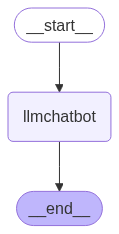

In [8]:
from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [9]:
response=graph.invoke({"messages":"Hi"})

In [10]:
response["messages"][-1].content

"Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?"

Chatbot with tool

In [16]:


from langchain_tavily import TavilySearch
tool =TavilySearch(max_results=2)
tool.invoke("What is langgraph")

{'query': 'What is langgraph',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.datacamp.com/tutorial/langgraph-tutorial',
   'title': 'LangGraph Tutorial: What Is LangGraph and How to Use It?',
   'content': 'LangGraph is a library within the LangChain ecosystem that provides a framework for defining, coordinating, and executing multiple LLM agents (or chains) in a structured and efficient manner. By managing the flow of data and the sequence of operations, LangGraph allows developers to focus on the high-level logic of their applications rather than the intricacies of agent coordination. Whether you need a chatbot that can handle various types of user requests or a multi-agent system that performs complex tasks, LangGraph provides the tools to build exactly what you need. LangGraph significantly simplifies the development of complex LLM applications by providing a structured framework for managing state and coordinating agent interaction

In [17]:
def multiply(a:int,b:int)->int:
    """ Multiply a and b

    Args:
        a(int):first int
        b(int):second int

    Returns:
        int: output int
    """

In [18]:
tools=[tool,multiply]

In [19]:
llm_with_tool=llm.bind_tools([multiply])

ValueError: Arg a(int) in docstring not found in function signature.